# Breast Cancer Classification

## Acquire and Review Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cncr = load_breast_cancer()

In [5]:
cncr.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [6]:
print cncr['DESCR']

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)
        
        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.
 

## Select feature and target set, assign them as 'X' and 'y'

In [7]:
X = pd.DataFrame(cncr.data, columns=cncr.feature_names)

In [8]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y = cncr['target']

## Obtain training and test sets

In [10]:
from sklearn.cross_validation import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=101)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

## Logistic Regression on all of the features

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
logit = LogisticRegression(C=1e5)

In [170]:
logit.fit(X_train,y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [171]:
log_preds = logit.predict(X_test)

In [172]:
from sklearn.metrics import confusion_matrix, classification_report

In [173]:
print confusion_matrix(y_test, log_preds)
print '\n'
print classification_report(y_test, log_preds)

[[ 60   6]
 [  1 104]]


             precision    recall  f1-score   support

          0       0.98      0.91      0.94        66
          1       0.95      0.99      0.97       105

avg / total       0.96      0.96      0.96       171



## Logistic Regression on Scaled Features

In [132]:
from sklearn.preprocessing import StandardScaler

First, scale and fit the training set.

In [133]:
scaler = StandardScaler()

In [134]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [135]:
scaled_X_train = scaler.transform(X_train)

In [146]:
logit_scaled = LogisticRegression()

In [147]:
logit_scaled.fit(scaled_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Second, scale and predict with the test set.

In [148]:
scaler = StandardScaler()
scaler.fit(X_test)
scaled_X_test = scaler.transform(X_test)

In [185]:
log_scaled_preds = logit_scaled.predict(scaled_X_test)

In [186]:
print confusion_matrix(y_test, log_scaled_preds)
print '\n'
print classification_report(y_test, log_scaled_preds)

[[ 63   3]
 [  0 105]]


             precision    recall  f1-score   support

          0       1.00      0.95      0.98        66
          1       0.97      1.00      0.99       105

avg / total       0.98      0.98      0.98       171



## LogisticRegression with Principal Components

In [28]:
from sklearn.decomposition import PCA

In [151]:
pca = PCA(n_components=3)

In [152]:
pca.fit(scaled_X_train)

PCA(copy=True, n_components=3, whiten=False)

In [153]:
pca_X_train = pca.transform(scaled_X_train)

In [161]:
logit_pca = LogisticRegression()

In [162]:
logit_pca.fit(pca_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Convert scaled X_test to principal components

In [163]:
pca = PCA(n_components=3)

In [164]:
pca.fit(scaled_X_test)

PCA(copy=True, n_components=3, whiten=False)

In [165]:
pca_X_test = pca.transform(scaled_X_test)

### Predict and evaluate

In [166]:
pca_preds = logit_pca.predict(pca_X_test)

In [167]:
print confusion_matrix(y_test,pca_preds)
print '\n'
print classification_report(y_test,pca_preds)

[[ 59   7]
 [  2 103]]


             precision    recall  f1-score   support

          0       0.97      0.89      0.93        66
          1       0.94      0.98      0.96       105

avg / total       0.95      0.95      0.95       171



After testing the amount of components, 2 components worked just as well as logisitic regression with unscaled features, and PCA with 3 components provides a slight improvement without negative results with additional components.  Logistic regression with scaled features still out performs these models. 

## KNN 

In [39]:
from sklearn.neighbors import KNeighborsClassifier

First, we will create a loop to test a bunch of K's, and then by observing through a visualization which K gives us the lowest error just before the model hits diminishing returns on performence.

In [60]:
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train, y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

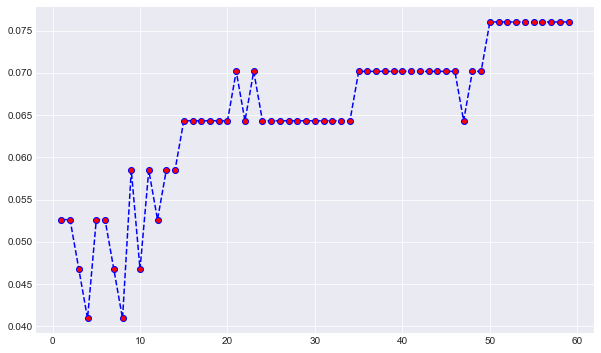

In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60), error_rate, color='b', marker='o', linestyle='--',markerfacecolor='red')

In [54]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaled_X_train, y_train)
knn_pred = knn.predict(scaled_X_test)

In [55]:
print confusion_matrix(y_test, knn_pred)
print'\n'
print classification_report(y_test, knn_pred)

[[ 59   7]
 [  1 104]]


             precision    recall  f1-score   support

          0       0.98      0.89      0.94        66
          1       0.94      0.99      0.96       105

avg / total       0.95      0.95      0.95       171



## Decision Tree Models

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_preds = dtree.predict(X_test)

print confusion_matrix(y_test, dtree_preds)
print '\n'
print classification_report(y_test, dtree_preds)

[[59  7]
 [ 8 97]]


             precision    recall  f1-score   support

          0       0.88      0.89      0.89        66
          1       0.93      0.92      0.93       105

avg / total       0.91      0.91      0.91       171



### Decision Tree on Scaled data

In [65]:
dtree = DecisionTreeClassifier()
dtree.fit(scaled_X_train, y_train)
dtree_preds = dtree.predict(scaled_X_test)

print confusion_matrix(y_test, dtree_preds)
print '\n'
print classification_report(y_test, dtree_preds)

[[58  8]
 [ 6 99]]


             precision    recall  f1-score   support

          0       0.91      0.88      0.89        66
          1       0.93      0.94      0.93       105

avg / total       0.92      0.92      0.92       171



### Decision Tree on PCA (3 components)

In [100]:
dtree = DecisionTreeClassifier()
dtree.fit(pca_X_train, y_train)
dtree_preds = dtree.predict(pca_X_test)

print confusion_matrix(y_test, dtree_preds)
print '\n'
print classification_report(y_test, dtree_preds)

[[ 55  11]
 [  1 104]]


             precision    recall  f1-score   support

          0       0.98      0.83      0.90        66
          1       0.90      0.99      0.95       105

avg / total       0.93      0.93      0.93       171



## Random Forests

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)

print confusion_matrix(y_test, rfc_preds)
print '\n'
print classification_report(y_test, rfc_preds)

[[ 63   3]
 [  4 101]]


             precision    recall  f1-score   support

          0       0.94      0.95      0.95        66
          1       0.97      0.96      0.97       105

avg / total       0.96      0.96      0.96       171



### Random Forest on scaled data

In [108]:
rfc2 = RandomForestClassifier(n_estimators=100)
rfc2.fit(scaled_X_train, y_train)
rfc2_preds = rfc2.predict(scaled_X_test)

print confusion_matrix(y_test, rfc2_preds)
print '\n'
print classification_report(y_test, rfc2_preds)

[[ 59   7]
 [  3 102]]


             precision    recall  f1-score   support

          0       0.95      0.89      0.92        66
          1       0.94      0.97      0.95       105

avg / total       0.94      0.94      0.94       171



### Random Forest on PCA (3 components)

In [109]:
rfc3 = RandomForestClassifier(n_estimators=100)
rfc3.fit(pca_X_train, y_train)
rfc3_preds = rfc3.predict(pca_X_test)

print confusion_matrix(y_test, rfc3_preds)
print '\n'
print classification_report(y_test, rfc3_preds)

[[ 57   9]
 [  5 100]]


             precision    recall  f1-score   support

          0       0.92      0.86      0.89        66
          1       0.92      0.95      0.93       105

avg / total       0.92      0.92      0.92       171



## SVM

In [111]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

In [116]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.001, 0.0001], 'kernel':['rbf']}

In [117]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [118]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.636364 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.636364 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.001 ..................................
[CV] ......... k

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.3s


[CV] ............ kernel=rbf, C=1000, gamma=1, score=0.631579 -   0.0s
[CV] kernel=rbf, C=1000, gamma=1 .....................................
[CV] ............ kernel=rbf, C=1000, gamma=1, score=0.636364 -   0.0s
[CV] kernel=rbf, C=1000, gamma=0.1 ...................................
[CV] .......... kernel=rbf, C=1000, gamma=0.1, score=0.631579 -   0.0s
[CV] kernel=rbf, C=1000, gamma=0.1 ...................................
[CV] .......... kernel=rbf, C=1000, gamma=0.1, score=0.631579 -   0.0s
[CV] kernel=rbf, C=1000, gamma=0.1 ...................................
[CV] .......... kernel=rbf, C=1000, gamma=0.1, score=0.636364 -   0.0s
[CV] kernel=rbf, C=1000, gamma=0.001 .................................
[CV] ........ kernel=rbf, C=1000, gamma=0.001, score=0.894737 -   0.0s
[CV] kernel=rbf, C=1000, gamma=0.001 .................................
[CV] ........ kernel=rbf, C=1000, gamma=0.001, score=0.932331 -   0.0s
[CV] kernel=rbf, C=1000, gamma=0.001 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [120]:
svc_preds = grid.predict(X_test)

print confusion_matrix(y_test, svc_preds)
print '\n'
print classification_report(y_test, svc_preds)

[[ 60   6]
 [  3 102]]


             precision    recall  f1-score   support

          0       0.95      0.91      0.93        66
          1       0.94      0.97      0.96       105

avg / total       0.95      0.95      0.95       171



### SVC on scaled data

In [183]:
grid2 = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid2.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.636364 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.909774 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.917293 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.931818 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.001 ..................................
[CV] ......... k

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [207]:
svc_preds2 = grid2.predict(scaled_X_test)

print confusion_matrix(y_test, svc_preds2)
print '\n'
print classification_report(y_test, svc_preds2)

[[ 63   3]
 [  0 105]]


             precision    recall  f1-score   support

          0       1.00      0.95      0.98        66
          1       0.97      1.00      0.99       105

avg / total       0.98      0.98      0.98       171



Later, we may want to build a ROC graph with this model, but the grid object doesn't work well for this, so we will grab the model the grid selected and build it directly in a SVC object.

In [208]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Set probability equal to true, it is an expensive calculation, but required to create a smooth ROC curve and to then calculate the AUC.

In [215]:
svc = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

svc.fit(scaled_X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [216]:
svc_preds2 = svc.predict(scaled_X_test)

print confusion_matrix(y_test, svc_preds2)
print '\n'
print classification_report(y_test, svc_preds2)

[[ 63   3]
 [  0 105]]


             precision    recall  f1-score   support

          0       1.00      0.95      0.98        66
          1       0.97      1.00      0.99       105

avg / total       0.98      0.98      0.98       171



### SVC with PCA (3 components)

In [123]:
grid3.fit(pca_X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.636364 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.917293 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.932331 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.954545 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.001 ..................................
[CV] ......... k

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [124]:
svc_preds = grid3.predict(pca_X_test)

print confusion_matrix(y_test, svc_preds)
print '\n'
print classification_report(y_test, svc_preds)

[[ 56  10]
 [  1 104]]


             precision    recall  f1-score   support

          0       0.98      0.85      0.91        66
          1       0.91      0.99      0.95       105

avg / total       0.94      0.94      0.93       171



### ROC & AUC: Visualization of our best models

So far our best performing models have been the logistic regression model with scaled features, the SVM model with scaled features, and the random forest model.  We will graph the ROC curve and calculate the AUC for each.  Any additional models can become cluttered on a ROC graph, especially when there is similar performance between the models.

In [180]:
from sklearn.metrics import roc_curve, roc_auc_score

In [237]:
#logistic regression scaled
logscaled_pred_bins = logit_scaled.predict_proba(scaled_X_test)[:,1]

logscaled_fpr, logscaled_tpr, logscaled_thresholds = roc_curve(y_test, logscaled_pred_bins)
logscaled_auc = roc_auc_score(y_test, logscaled_pred_bins)


#SVC scaled
svc_pred_bins = svc.predict_proba(scaled_X_test)[:,1]

svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test,svc_pred_bins)
svc_auc = roc_auc_score(y_test, svc_pred_bins)

#Random Forest
rfc_pred_bins = rfc.predict_proba(X_test)[:,1]

rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_pred_bins)
rfc_auc = roc_auc_score(y_test, rfc_pred_bins)

In [233]:
sns.set_style('whitegrid')

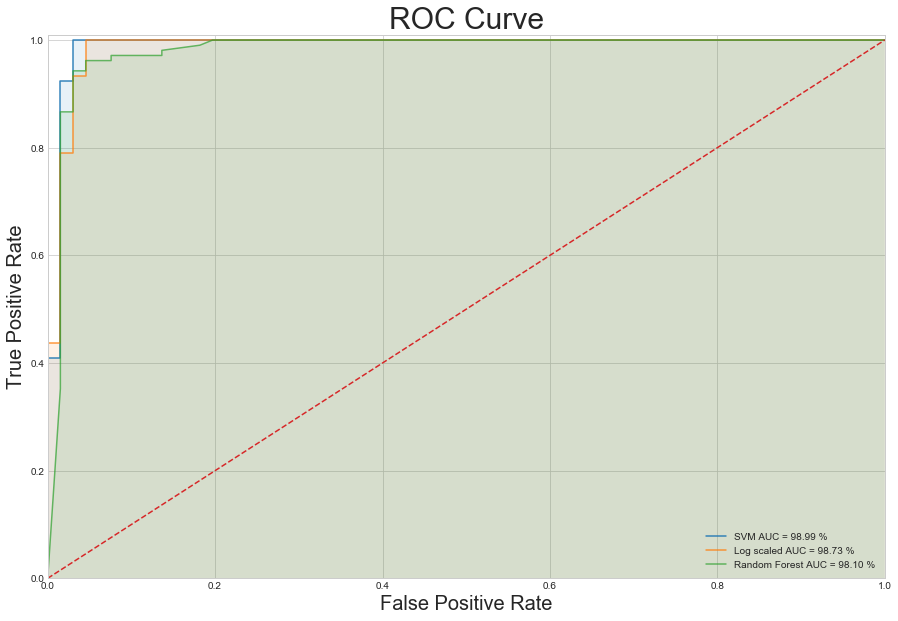

In [235]:
fpr_rand = lpr_rand = np.linspace(0,1,10)

plt.figure(figsize=(15,10))

plt.plot(svc_fpr, svc_tpr, alpha=0.9,label='SVM AUC = %0.2f %%' %(svc_auc*100))
plt.plot(logscaled_fpr, logscaled_tpr, alpha=0.8, label='Log scaled AUC = %0.2f %%' %(logscaled_auc*100))
plt.plot(rfc_fpr, rfc_tpr, alpha=0.7, label='Random Forest AUC = %0.2f %%' %(rfc_auc*100))


plt.legend(loc='lower right')
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('ROC Curve',fontsize=30)
plt.fill_between(svc_fpr,svc_tpr, alpha=0.1)
plt.fill_between(logscaled_fpr,logscaled_tpr, alpha=0.1)
plt.fill_between(rfc_fpr,rfc_tpr, alpha=0.1)
plt.xlim(xmin=0,xmax=1)
plt.ylim(ymin=0,ymax=1.01)
plt.plot(fpr_rand,lpr_rand,linestyle='--')

Even though the Log scaled model has the same prediction scores as the SVC scaled model, the SVC scaled model has a slightly better AUC. This may have been caused by the expensive calculations sklearn makes to obtain the probabilities for SVC predictions, which involves a hidden round of cross validation (see sklearn documentation).  The Log scaled model is probably the best model to use for this data set because of the combination of it's simplicity and accurate performance.  